In [2]:
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import os
import gensim
from gensim import corpora
%matplotlib notebook

In [3]:
stopWords = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [4]:
summaryDir = "./Datasets/Summaries"
summaryFiles = os.listdir(summaryDir)

In [5]:
import pandas as pd

In [6]:
documents = []
for sFile in summaryFiles:
    f = open(os.path.join(summaryDir,sFile))
    documents.append(f.read())

In [7]:
data = pd.DataFrame({'Documents':documents})   # Creating data frame for documents

In [8]:
def clean(doc):
    stopFree = " ".join([word for word in doc.lower().split() if word not in stopWords])
    puncFree = "".join([word for word in stopFree if word not in exclude])
    normalized = " ".join([lemma.lemmatize(word) for word in puncFree.split()])
    return normalized

In [9]:
data['Clean Documents'] = data['Documents'].map(clean)

``` Now the Dataframe will contain the documents and their cleaned (normalized versions) with it ```

``` Now creating Bag Of Words on the Dataset ```

In [10]:
# Creating Bag of Words
docsForDict = []
for doc in data['Clean Documents']:
    tokens = doc.split()
    docsForDict.append(tokens)

In [11]:
data['Token Lists'] = docsForDict

In [12]:
dictionary = gensim.corpora.Dictionary(data['Token Lists'])

In [13]:
bagOfWords = [dictionary.doc2bow(doc) for doc in data['Token Lists']]

In [14]:
bagOfWords10 = bagOfWords[10]
for value in bagOfWords10:
    print("Word:",value[0],":",dictionary[value[0]],"appears",value[1],"times.")

Word: 19 : also appears 2 times.
Word: 20 : analysis appears 2 times.
Word: 24 : analyzing appears 1 times.
Word: 26 : argument appears 1 times.
Word: 31 : assumed appears 1 times.
Word: 37 : case appears 1 times.
Word: 51 : consists appears 1 times.
Word: 55 : could appears 1 times.
Word: 67 : every appears 1 times.
Word: 74 : first appears 1 times.
Word: 82 : identifying appears 2 times.
Word: 85 : instance appears 1 times.
Word: 97 : must appears 1 times.
Word: 102 : one appears 1 times.
Word: 103 : order appears 1 times.
Word: 110 : relation appears 1 times.
Word: 115 : respectively appears 1 times.
Word: 117 : result appears 1 times.
Word: 120 : section appears 6 times.
Word: 127 : set appears 6 times.
Word: 131 : since appears 1 times.
Word: 133 : source appears 1 times.
Word: 135 : structure appears 18 times.
Word: 140 : therefore appears 1 times.
Word: 142 : three appears 1 times.
Word: 143 : tree appears 33 times.
Word: 144 : two appears 7 times.
Word: 146 : use appears 2 time

``` Creating the TF-IDF Model on the BagOfWords ```

In [15]:
from gensim import models
tfIdf = models.TfidfModel(bagOfWords)

In [16]:
corpusTfIdf = tfIdf[bagOfWords]

In [17]:
corpusTfIdf[1]

[(6, 0.0063309794583893296),
 (16, 0.011099543936877992),
 (19, 0.002421228796177869),
 (20, 0.01868742373432438),
 (24, 0.015375772155766326),
 (32, 0.01239226965830445),
 (33, 0.026943624664441133),
 (34, 0.016353161128169823),
 (49, 0.03270632225633965),
 (71, 0.027612461987154727),
 (74, 0.0026723718043296864),
 (78, 0.010105509906997061),
 (86, 0.014942186141414869),
 (88, 0.0162216784318173),
 (103, 0.0036171919957734494),
 (104, 0.0045291480354023765),
 (106, 0.002470602369836127),
 (110, 0.09680144478468378),
 (114, 0.022837810655909094),
 (120, 0.004389838269311124),
 (126, 0.006831346925506218),
 (131, 0.003990769958366832),
 (132, 0.03382159122909624),
 (135, 0.0986272557919883),
 (136, 0.006727791412284012),
 (139, 0.0417156560205006),
 (143, 0.019878110868313623),
 (144, 0.0014703738091943028),
 (147, 0.001597109459641685),
 (153, 0.005044640199672259),
 (154, 0.2194466274664879),
 (155, 0.020966215222502447),
 (156, 0.022271768730860037),
 (157, 0.021773533066921084),
 (1

``` Making LDA on Bag Of Words ```

In [18]:
Lda = gensim.models.ldamodel.LdaModel
ldaBow = Lda(bagOfWords,id2word=dictionary,passes=50)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [19]:
ldaBow.print_topics(-1)

[(0,
  '0.068*"rule" + 0.041*"french" + 0.026*"feature" + 0.024*"verb" + 0.018*"english" + 0.016*"spanish" + 0.016*"clitics" + 0.015*"form" + 0.014*"syntax" + 0.011*"clitic"'),
 (1,
  '0.029*"clause" + 0.026*"tree" + 0.020*"decision" + 0.019*"model" + 0.018*"goal" + 0.018*"sentence" + 0.015*"decisiontree" + 0.014*"parse" + 0.014*"item" + 0.012*"parsing"'),
 (2,
  '0.097*"sign" + 0.068*"bag" + 0.054*"dog" + 0.047*"generation" + 0.036*"brown" + 0.036*"generator" + 0.033*"lexical" + 0.029*"domain" + 0.029*"the" + 0.028*"outer"'),
 (3,
  '0.000*"belief" + 0.000*"clause" + 0.000*"system" + 0.000*"sentence" + 0.000*"agent" + 0.000*"user" + 0.000*"proposed" + 0.000*"model" + 0.000*"evidence" + 0.000*"reading"'),
 (4,
  '0.044*"coreference" + 0.043*"phrase" + 0.023*"information" + 0.022*"system" + 0.021*"set" + 0.020*"muc5" + 0.019*"rule" + 0.018*"coreferent" + 0.018*"reference" + 0.016*"feature"'),
 (5,
  '0.000*"word" + 0.000*"sentence" + 0.000*"text" + 0.000*"vector" + 0.000*"two" + 0.000*"

``` Making LDA on Tf-Idf Values ```

In [20]:
ldaTfIdf = Lda(corpusTfIdf,id2word=dictionary,passes=50)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:807: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words


In [21]:
ldaTfIdf.print_topics(-1)

[(0,
  '0.008*"vector" + 0.007*"generic" + 0.006*"hobbs" + 0.006*"bfp" + 0.004*"snipe" + 0.003*"eats" + 0.003*"meat" + 0.002*"disjunct" + 0.002*"disjuncts" + 0.002*"partial"'),
 (1,
  '0.006*"lambek" + 0.005*"calculus" + 0.004*"genre" + 0.004*"discriminant" + 0.003*"sdl" + 0.003*"usenet" + 0.002*"permutation" + 0.002*"semidirectional" + 0.002*"lp" + 0.002*"sequent"'),
 (2,
  '0.012*"guessing" + 0.006*"kanzi" + 0.005*"character" + 0.005*"lazy" + 0.004*"morphological" + 0.003*"knowledgebased" + 0.003*"compound" + 0.003*"thesaurus" + 0.002*"alteration" + 0.002*"ruleset"'),
 (3,
  '0.006*"attributevalue" + 0.005*"ravg" + 0.002*"nonterminal" + 0.002*"hpavg" + 0.002*"poly" + 0.002*"avg" + 0.002*"ravgs" + 0.001*"counter" + 0.001*"bit" + 0.001*"hpc"'),
 (4,
  '0.032*"grammar" + 0.012*"interpretation" + 0.012*"parsing" + 0.011*"categorial" + 0.010*"logic" + 0.009*"parser" + 0.009*"semantic" + 0.009*"phrase" + 0.008*"category" + 0.008*"coordination"'),
 (5,
  '0.000*"unprompted" + 0.000*"webber"

``` Making Concept Maps ```

In [22]:
conceptMapBow = dict()
conceptWeightsBow = dict()
for tup in ldaBow.print_topics(-1):
    s = tup[1]
    s = s.split('+')
    l = []
    for ele in s:
        l.append(ele[:-1])
    l1 = []
    l2 = []
    for ele in l:
        t = ele.split('"')
        l1.append(t[1])
        l2.append(float(t[0][:-1]))
    conceptMapBow[tup[0]] = l1
    conceptWeightsBow[tup[0]] = l2

In [23]:
conceptMapTfIdf = dict()
conceptWeightsTfIdf = dict()
for tup in ldaTfIdf.print_topics(-1):
    s = tup[1]
    s = s.split('+')
    l = []
    for ele in s:
        l.append(ele[:-1])
    l1 = []
    l2 = []
    for ele in l:
        t = ele.split('"')
        l1.append(t[1])
        l2.append(float(t[0][:-1]))
    conceptMapTfIdf[tup[0]] = l1
    conceptWeightsTfIdf[tup[0]] = l2

In [24]:
print(conceptMapTfIdf)

{0: ['vector', 'generic', 'hobbs', 'bfp', 'snipe', 'eats', 'meat', 'disjunct', 'disjuncts', 'partial'], 1: ['lambek', 'calculus', 'genre', 'discriminant', 'sdl', 'usenet', 'permutation', 'semidirectional', 'lp', 'sequent'], 2: ['guessing', 'kanzi', 'character', 'lazy', 'morphological', 'knowledgebased', 'compound', 'thesaurus', 'alteration', 'ruleset'], 3: ['attributevalue', 'ravg', 'nonterminal', 'hpavg', 'poly', 'avg', 'ravgs', 'counter', 'bit', 'hpc'], 4: ['grammar', 'interpretation', 'parsing', 'categorial', 'logic', 'parser', 'semantic', 'phrase', 'category', 'coordination'], 5: ['unprompted', 'webber', 'subgoals', 'subordination', 'tannen', 'tod', 'transferred', 'uh', 'started', 'contextdependence'], 6: ['gb', 'monadic', 'secondorder', 'chain', 'trace', 'freeindexation', 'government', 'antecedentgovernment', 'index', 'nondefinability'], 7: ['probabilistic', 'decisiontree', 'neural', 'net', 'nonterminal', 'parse', 'equivalence', 'question', 'trained', 'decision'], 8: ['unprompted'

In [25]:
print(conceptMapBow)

{0: ['rule', 'french', 'feature', 'verb', 'english', 'spanish', 'clitics', 'form', 'syntax', 'clitic'], 1: ['clause', 'tree', 'decision', 'model', 'goal', 'sentence', 'decisiontree', 'parse', 'item', 'parsing'], 2: ['sign', 'bag', 'dog', 'generation', 'brown', 'generator', 'lexical', 'domain', 'the', 'outer'], 3: ['belief', 'clause', 'system', 'sentence', 'agent', 'user', 'proposed', 'model', 'evidence', 'reading'], 4: ['coreference', 'phrase', 'information', 'system', 'set', 'muc5', 'rule', 'coreferent', 'reference', 'feature'], 5: ['word', 'sentence', 'text', 'vector', 'two', 'context', 'corpus', 'used', 'tag', 'tagging'], 6: ['segment', 'text', 'boundary', 'word', 'lcp', 'lexical', 'similarity', 'cohesion', 'cohesiveness', 'valley'], 7: ['dialect', 'site', 'pitch', 'accent', 'distance', 'group', 'word', 'pronominal', 'attentional', 'accented'], 8: ['text', 'vehicle', 'car', 'two', 'right', 'accident', 'type', 'b', 'driver', 'left'], 9: ['gapping', 'vpellipsis', 'inference', 'represe

In [30]:
conceptWeightsBow

{0: [0.062, 0.026, 0.015, 0.015, 0.015, 0.014, 0.014, 0.014, 0.013, 0.013],
 1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 2: [0.042, 0.035, 0.02, 0.019, 0.018, 0.017, 0.016, 0.015, 0.013, 0.012],
 3: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 4: [0.035, 0.028, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014],
 5: [0.045, 0.035, 0.034, 0.03, 0.028, 0.025, 0.016, 0.016, 0.015, 0.015],
 6: [0.118, 0.05, 0.028, 0.02, 0.017, 0.015, 0.015, 0.013, 0.012, 0.011],
 7: [0.045, 0.027, 0.025, 0.022, 0.019, 0.017, 0.016, 0.013, 0.012, 0.011],
 8: [0.03, 0.022, 0.022, 0.02, 0.02, 0.019, 0.016, 0.015, 0.015, 0.013],
 9: [0.087, 0.077, 0.052, 0.028, 0.023, 0.021, 0.021, 0.017, 0.012, 0.012],
 10: [0.046, 0.03, 0.03, 0.024, 0.022, 0.021, 0.02, 0.02, 0.013, 0.012],
 11: [0.034, 0.021, 0.018, 0.017, 0.016, 0.016, 0.016, 0.016, 0.015, 0.012],
 12: [0.043, 0.039, 0.035, 0.032, 0.032, 0.027, 0.024, 0.018, 0.015, 0.015],
 13: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 14

In [32]:
conceptWeightsTfIdf

{0: [0.007, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 1: [0.005, 0.004, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001],
 2: [0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001],
 3: [0.014, 0.006, 0.006, 0.005, 0.004, 0.004, 0.003, 0.003, 0.003, 0.002],
 4: [0.01, 0.008, 0.008, 0.008, 0.007, 0.006, 0.006, 0.006, 0.006, 0.006],
 5: [0.007, 0.007, 0.004, 0.003, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001],
 6: [0.005, 0.004, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 7: [0.005, 0.005, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.002, 0.002],
 8: [0.012, 0.008, 0.007, 0.006, 0.005, 0.004, 0.004, 0.003, 0.002, 0.002],
 9: [0.007, 0.006, 0.005, 0.005, 0.003, 0.001, 0.001, 0.001, 0.001, 0.001],
 10: [0.005, 0.005, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.003, 0.002],
 11: [0.008, 0.005, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001],
 12: [0.004, 0.003, 0.003, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001],
 13: [0.0,

## TfIdf Clustering

In [1]:
trainingClusteringTfIdf = conceptWeightsTfIdf.values()
trainingClusteringTfIdf = list(trainingClusteringTfIdf)

NameError: name 'conceptWeightsTfIdf' is not defined

In [43]:
trainingClusteringBow

[[0.062, 0.026, 0.015, 0.015, 0.015, 0.014, 0.014, 0.014, 0.013, 0.013],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.042, 0.035, 0.02, 0.019, 0.018, 0.017, 0.016, 0.015, 0.013, 0.012],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.035, 0.028, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014],
 [0.045, 0.035, 0.034, 0.03, 0.028, 0.025, 0.016, 0.016, 0.015, 0.015],
 [0.118, 0.05, 0.028, 0.02, 0.017, 0.015, 0.015, 0.013, 0.012, 0.011],
 [0.045, 0.027, 0.025, 0.022, 0.019, 0.017, 0.016, 0.013, 0.012, 0.011],
 [0.03, 0.022, 0.022, 0.02, 0.02, 0.019, 0.016, 0.015, 0.015, 0.013],
 [0.087, 0.077, 0.052, 0.028, 0.023, 0.021, 0.021, 0.017, 0.012, 0.012],
 [0.046, 0.03, 0.03, 0.024, 0.022, 0.021, 0.02, 0.02, 0.013, 0.012],
 [0.034, 0.021, 0.018, 0.017, 0.016, 0.016, 0.016, 0.016, 0.015, 0.012],
 [0.043, 0.039, 0.035, 0.032, 0.032, 0.027, 0.024, 0.018, 0.015, 0.015],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.047, 0.033, 0.032, 0.025, 0.02, 0.02, 0.017, 

In [44]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

<IPython.core.display.Javascript object>


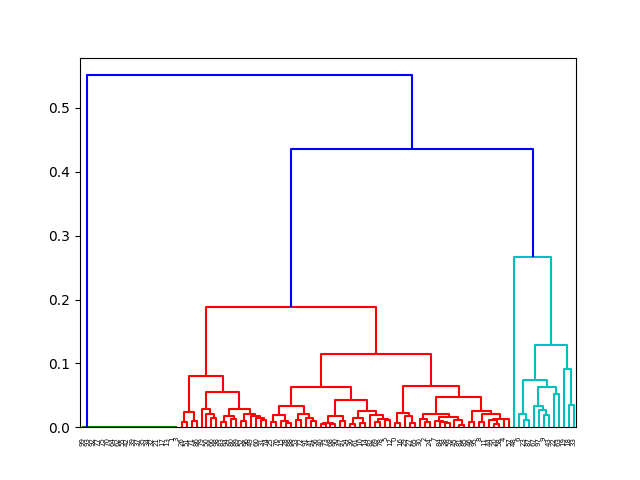

In [47]:
dendrogram = sch.dendrogram(sch.linkage(trainingClusteringBow,method='ward'))

In [48]:
hc = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean',linkage = 'ward')

In [51]:
clustersBow = hc.fit_predict(trainingClustering)

In [52]:
cluster1Bow = []
cluster2Bow = []
cluster3Bow = []
cluster4Bow = []
for i in range(len(trainingClustering)):
    if clustersBow[i] == 0:
        cluster1Bow.append(trainingClustering[i])
    elif clustersBow[i] == 1:
        cluster2Bow.append(trainingClustering[i])
    elif clustersBow[i] == 2:
        cluster3Bow.append(trainingClustering[i])
    elif clustersBow[i] == 3:
        cluster4Bow.append(trainingClustering[i])

In [53]:
print("Length of Cluster 1:",len(cluster1Bow))
print("Length of Cluster 2:",len(cluster2Bow))
print("Length of Cluster 3:",len(cluster3Bow))
print("Length of Cluster 4:",len(cluster4Bow))

Length of Cluster 1: 67
Length of Cluster 2: 20
Length of Cluster 3: 12
Length of Cluster 4: 1


In [54]:
conceptWeightListBow = list(conceptWeightsBow.values())
conceptWordsListBow = list(conceptMapBow.values())

In [55]:
cluster1WordsBow = []
cluster2WordsBow = []
cluster3WordsBow = []
cluster4WordsBow = []
for vec in cluster1Bow:
    ind = conceptWeightListBow.index(vec)
    cluster1WordsBow.append(conceptWordsListBow[ind])
for vec in cluster2Bow:
    ind = conceptWeightListBow.index(vec)
    cluster2WordsBow.append(conceptWordsListBow[ind])
for vec in cluster3Bow:
    ind = conceptWeightListBow.index(vec)
    cluster3WordsBow.append(conceptWordsListBow[ind])
for vec in cluster4Bow:
    ind = conceptWeightListBow.index(vec)
    cluster4WordsBow.append(conceptWordsListBow[ind])

In [57]:
# Only for WordCloud. Total Show-off!
cluster1SentsBow = [' '.join(ele) for ele in cluster1WordsBow]
cluster2SentsBow = [' '.join(ele) for ele in cluster2WordsBow]
cluster3SentsBow = [' '.join(ele) for ele in cluster3WordsBow]
cluster4SentsBow = [' '.join(ele) for ele in cluster4WordsBow]

In [58]:
cluster1SentsBow = ' '.join(cluster1SentsBow)
cluster2SentsBow = ' '.join(cluster2SentsBow)
cluster3SentsBow = ' '.join(cluster3SentsBow)
cluster4SentsBow = ' '.join(cluster4SentsBow)

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [61]:
# WordCloud for Cluster 1
wordcloud1Bow = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster1SentsBow) 

<IPython.core.display.Javascript object>


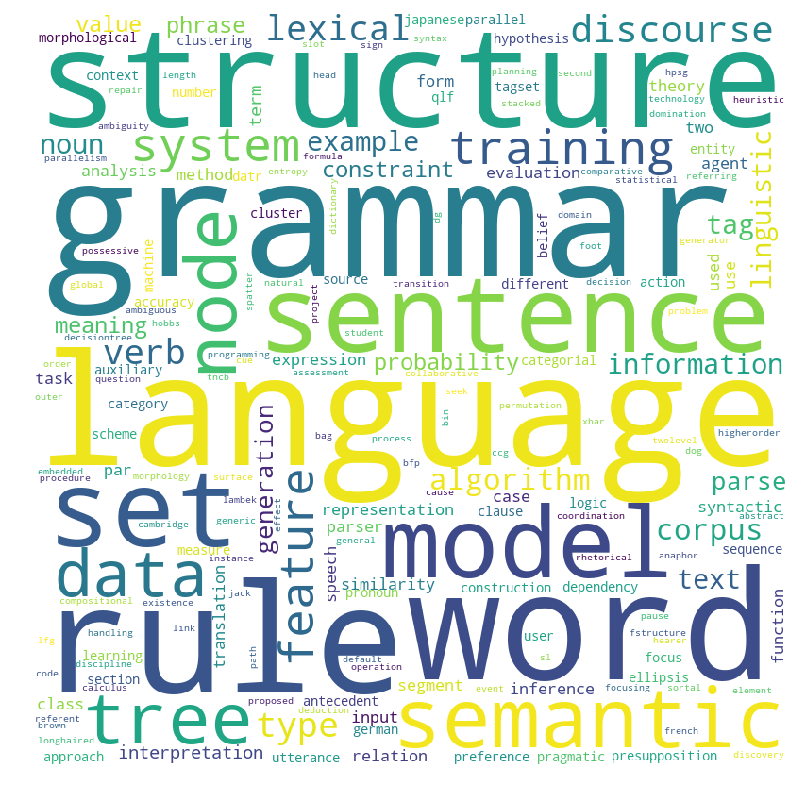

In [62]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud1Bow) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<IPython.core.display.Javascript object>


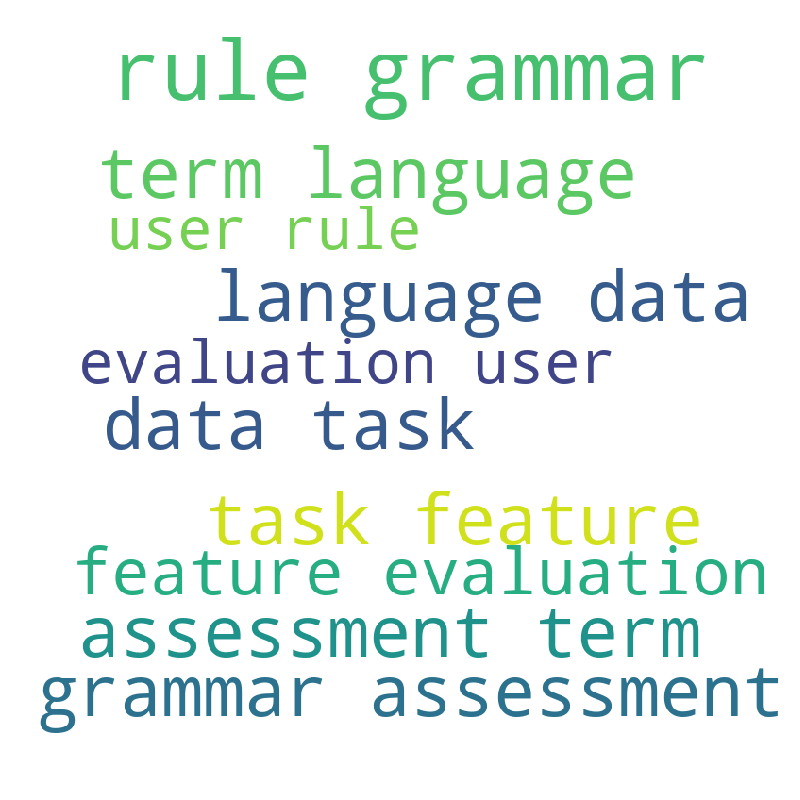

In [64]:
wordcloud2Bow = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster2SentsBow) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2Bow) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<IPython.core.display.Javascript object>


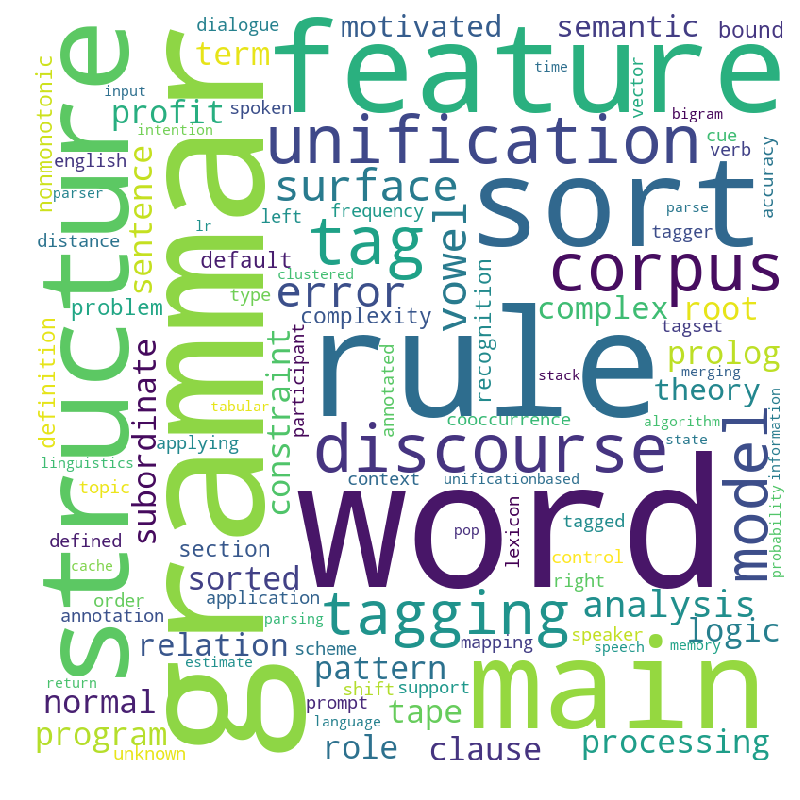

In [65]:
wordcloud3Bow = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster3SentsBow) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud3Bow) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

<IPython.core.display.Javascript object>


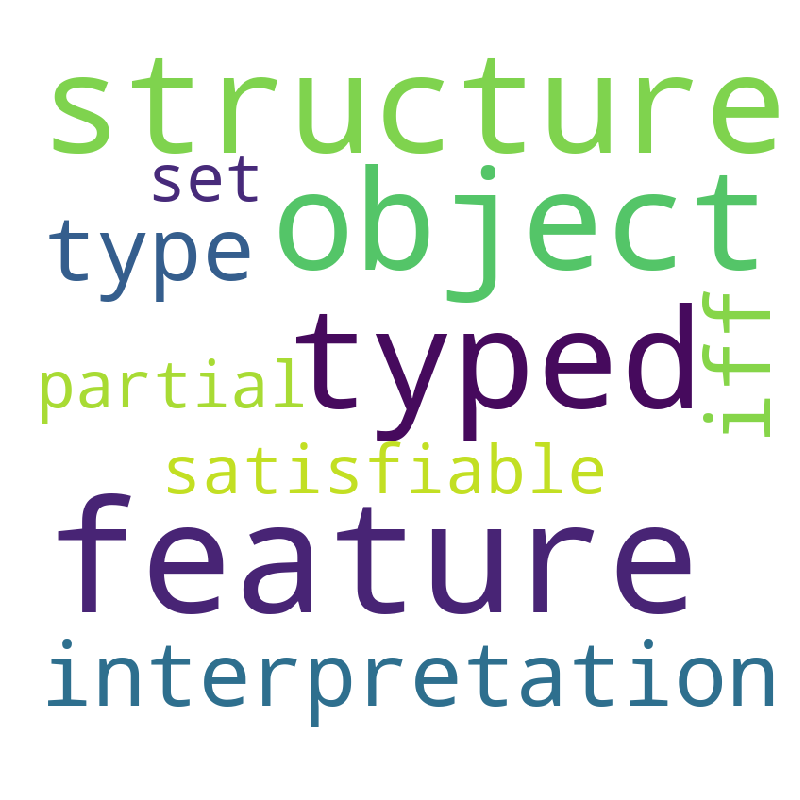

In [66]:
wordcloud4Bow = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cluster4SentsBow) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud4Bow) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 